<a href="https://colab.research.google.com/github/pandeymuskan30/Hypothesis-Testing-Anova-and-Regression/blob/main/Hypothesis_Testing_and_ANOVA_(Analysis_of_Variance).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

t-test to evaluate whether our hypothesis is correct or not.

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
df_glass = pd.read_csv("/content/glass.csv")

# Show first rows
print(df_glass.head())
# Extract the column to test (Refractive Index: RI)
data = df_glass['RI']

print("\nData Used for Testing (RI):")
print(data[:10])  # show first 10 values

# Hypotheses
H0 = "The average refractive index (RI) of glass is 1.517."
H1 = "The average refractive index (RI) of glass is greater than 1.517."
print("\nNull Hypothesis (H0):", H0)
print("Alternative Hypothesis (H1):", H1)

# Perform One-sample T-test
t_stat, p_value = stats.ttest_1samp(data, 1.517)
print("\nTest Statistic:", t_stat)
print("p-value (two-tailed):", p_value)

# Since we have a one-tailed test (greater than), divide p-value by 2
one_tailed_p = p_value / 2
print("One-tailed p-value:", one_tailed_p)

# Conclusion
alpha = 0.05
print("\nSignificance Level (α):", alpha)
if one_tailed_p < alpha and t_stat > 0:
    print("👉 Reject H0: The mean RI is significantly GREATER than 1.517.")
else:
    print("👉 Fail to Reject H0: Not enough evidence to say RI > 1.517.")

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1

Data Used for Testing (RI):
0    1.52101
1    1.51761
2    1.51618
3    1.51766
4    1.51742
5    1.51596
6    1.51743
7    1.51756
8    1.51918
9    1.51755
Name: RI, dtype: float64

Null Hypothesis (H0): The average refractive index (RI) of glass is 1.517.
Alternative Hypothesis (H1): The average refractive index (RI) of glass is greater than 1.517.

Test Statistic: 6.577305569760427
p-value (two-tailed): 3.646248374811047e-10
One-tailed p-value: 1.8231241874055234e-10

Significance Level (α): 0.05
👉 Reject H0: The mean RI is significantly GREATER than 1.517.


🎯 Step 1: Formulate Hypotheses

H₀ (Null Hypothesis):
The proportion of Glass Type 1 and Type 2 in the dataset is equal (no significant difference).

H₁ (Alternative Hypothesis):
The proportion of Glass Type 1 and Type 2 is not equal (there is a significant difference).

Observed counts (Type 1 & Type 2): [70 76]
Expected counts: [np.float64(73.0), np.float64(73.0)]

Chi-square Statistic: 0.2465753424657534
p-value: 0.6194968743386211

Significance Level α = 0.05
👉 Fail to Reject H₀: No significant difference between Type 1 and Type 2 frequencies.


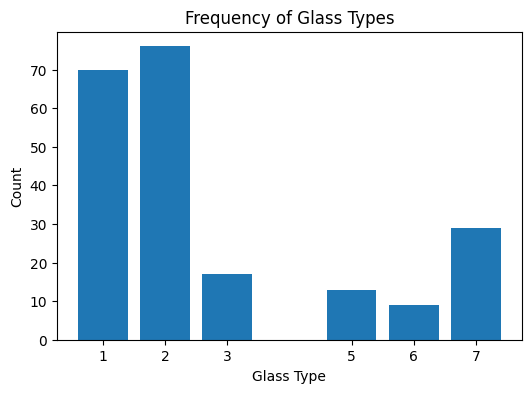

In [ ]:
import pandas as pd
from scipy.stats import chisquare
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("/content/glass.csv")

# Count Type 1 and Type 2 samples
type_counts = df['Type'].value_counts()

# Extract only Type 1 and Type 2
observed = type_counts[[1, 2]].values
print("Observed counts (Type 1 & Type 2):", observed)

# Expected counts assuming equal proportion
expected = [sum(observed)/2, sum(observed)/2]
print("Expected counts:", expected)

# Chi-square test
chi_stat, p_value = chisquare(f_obs=observed, f_exp=expected)
print("\nChi-square Statistic:", chi_stat)
print("p-value:", p_value)
# Conclusion
alpha = 0.05
print("\nSignificance Level α =", alpha)
if p_value < alpha:
    print("👉 Reject H₀: There is a significant difference between Type 1 and Type 2 frequencies.")
else:
    print("👉 Fail to Reject H₀: No significant difference between Type 1 and Type 2 frequencies.")
# Count frequency of each glass type
type_counts = df['Type'].value_counts()

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values)
plt.title("Frequency of Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Count")
plt.xticks(type_counts.index)
plt.show()

📊 Step 3: Interpretation

After running the test, you will get a p-value.

If p-value < 0.05

Evidence suggests Type 1 and Type 2 do NOT appear equally in the dataset.

Their distribution is statistically significantly different.

We reject the null hypothesis.

If p-value ≥ 0.05

No strong evidence against equal representation.

The observed difference may be due to random chance.

We fail to reject the null hypothesis.

✅ 1. Formulate Null and Alternative Hypotheses

We want to determine whether the mean Sodium (Na) content in Glass Type 1 is different from that in Glass Type 2.

Null Hypothesis (H₀):
There is no significant difference in mean Sodium content between Type 1 and Type 2 glass samples.
🔹
𝐻
0
:
𝜇
1
=
𝜇
2
H
0
	​

:μ
1
	​

=μ
2
	​


Alternative Hypothesis (H₁):
There is a significant difference in mean Sodium content between the two groups.
🔹
𝐻
1
:
𝜇
1
≠
𝜇
2
H
1
	​

:μ
1
	​


=μ
2
	​


This is a two-tailed hypothesis test.

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind
df = pd.read_csv("/content/glass.csv")
# Extract Sodium values for Glass Type 1 and Type 2
type1 = df[df['Type'] == 1]['Na']
type2 = df[df['Type'] == 2]['Na']

# Perform Independent Two-Sample t-test (Welch's t-test)
t_stat, p_value = ttest_ind(type1, type2, equal_var=False)

# Significance level
alpha = 0.05
# Print values
print("T-statistic:", round(t_stat, 4))
print("P-value:", round(p_value, 4))
print("Significance Level (alpha):", alpha)
# Hypothesis Decision
if p_value < alpha:
    print("\nConclusion: Reject the Null Hypothesis (H₀).")
    print("There is a statistically significant difference in Sodium levels between Type 1 and Type 2 glass samples.")
else:
    print("\nConclusion: Fail to Reject the Null Hypothesis (H₀).")
    print("There is NO statistically significant difference in Sodium levels between Type 1 and Type 2 glass samples.")

T-statistic: 1.3493
P-value: 0.1795
Significance Level (alpha): 0.05

Conclusion: Fail to Reject the Null Hypothesis (H₀).
There is NO statistically significant difference in Sodium levels between Type 1 and Type 2 glass samples.


3. Interpret the Results and Draw Conclusion

Using a standard significance level:

📌 α = 0.05

If p-value < 0.05 → Reject H₀

If p-value ≥ 0.05 → Fail to reject H₀

 **Practical 8 :
ANOVA (Analysis of Variance)**

Objective : Compare the mean Sodium (Na) concentration across multiple Glass Types and determine whether at least one group mean is significantly different.

In [ ]:
 #: One-Way ANOVA Code
import pandas as pd
from scipy.stats import f_oneway

df = pd.read_csv("/content/glass.csv")

# Group Na values by Glass Type
groups = [df[df['Type'] == t]['Na'] for t in df['Type'].unique()]

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(*groups)
print("One-Way ANOVA Results")
print("----------------------")
print("F-statistic:", round(f_stat, 4))
print("P-value:", round(p_value, 4))

# Decision rule
alpha = 0.05
if p_value < alpha:
    print("\nConclusion: Reject the Null Hypothesis (H₀).")
    print("At least one group mean is significantly different.")
else:
    print("\nConclusion: Fail to Reject the Null Hypothesis (H₀).")
    print("No significant difference between group means.")

One-Way ANOVA Results
----------------------
F-statistic: 28.548
P-value: 0.0

Conclusion: Reject the Null Hypothesis (H₀).
At least one group mean is significantly different.


In [ ]:
# Post-Hoc Test (Tukey HSD)   We run this only if ANOVA is significant
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Prepare data for Tukey test
na_values = df['Na']
glass_types = df['Type']

# Perform Tukey HSD Post-Hoc test
tukey_result = pairwise_tukeyhsd(endog=na_values, groups=glass_types, alpha=0.05)

print("\nTukey HSD Post-Hoc Test Results")
print("--------------------------------")
print(tukey_result)


Tukey HSD Post-Hoc Test Results
--------------------------------
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.1306 0.8173 -0.4338 0.1727  False
     1      3   0.1948 0.8676 -0.3002 0.6897  False
     1      5  -0.4146 0.2625 -0.9674 0.1382  False
     1      6   1.4044    0.0  0.7562 2.0526   True
     1      7   1.1998    0.0  0.7955  1.604   True
     2      3   0.3253 0.4016 -0.1658 0.8165  False
     2      5   -0.284 0.6729 -0.8334 0.2654  False
     2      6    1.535    0.0  0.8897 2.1802   True
     2      7   1.3304    0.0  0.9308 1.7299   True
     3      5  -0.6094 0.1021 -1.2838 0.0651  False
     3      6   1.2096 0.0001   0.455 1.9642   True
     3      7    1.005    0.0  0.4459 1.5642   True
     5      6    1.819    0.0  1.0252 2.6127   True
     5      7   1.6144    0.0  1.0034 2.2254   True
     6      7  -0.2046 0.9591 -0.9031 0.4939  Fals

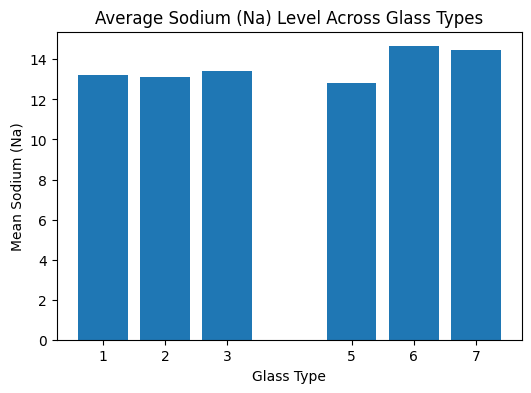

In [ ]:
# Group by Type and calculate mean Sodium value
mean_na = df.groupby("Type")["Na"].mean()

# Plot a simple bar chart
plt.figure(figsize=(6,4))
plt.bar(mean_na.index, mean_na.values)
plt.title("Average Sodium (Na) Level Across Glass Types")
plt.xlabel("Glass Type")
plt.ylabel("Mean Sodium (Na)")
plt.xticks(mean_na.index)
plt.show()